## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [3]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape,output_units=10,l1=0,l2=0):
    input_layer = keras.layers.Input(input_shape)
    x=keras.layers.Dense(activation="relu",units=512,kernel_regularizer=l1(l1=l1))(input_layer)
    x=keras.layers.Dense(activation="relu",units=256,kernel_regularizer=l1(l1=l1))(x)
    x=keras.layers.Dense(activation="relu",units=128,kernel_regularizer=l1(l1=l1))(x)
    out=keras.layers.Dense(activation="softmax",units=output_units)(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])   
    return model

In [23]:
from keras.optimizers import SGD,Adam,RMSprop
from keras.regularizers import l1, l2, l1_l2
results = {}

#opt=[SGD,Adam,RMSprop]
diu=[[0,0],[1e-1,1e-1],[2e-1,2e-1],[3e-1,3e-1],[4e-1,1e-1],[5e-1,1e-1],[6e-1,2e-1],[7e-1,2e-1]]

learning=[1e-2]
EPOCHS = 50
BATCH_SIZE = 256
for a1,a2 in diu:
    
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1:%s-L2:%s" % (str(a1),str(a2)))
    model = build_mlp(input_shape=x_train.shape[1:],l1=a1,l2=a2)
    
    #opt = SGD(kernel_regularizer=l1_l2(l1,l2))
    for lr in learning:
        print("Experiment with L1:%s-L2:%s and Learning:%s" % (str(a1),str(a2),lr))
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=SGD(lr=lr))
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-opt-l1=%s-l2=%s-lr-%s" % (str(a1),str(a2),str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 

Experiment with L1:0-L2:0
Experiment with L1:0-L2:0 and Learning:0.01
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.0729 - accuracy: 0.2685 - val_loss: 1.9660 - val_accuracy: 0.3070
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8839 - accuracy: 0.3383 - val_loss: 1.9051 - val_accuracy: 0.3331
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8172 - accuracy: 0.3620 - val_loss: 1.7993 - val_accuracy: 0.3614
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7716 - accuracy: 0.3770 - val_loss: 1.8152 - val_accuracy: 0.3478
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7357 - accuracy: 0.3894 - val_loss: 1.7296 - val_accuracy: 0.3911
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7057 - accuracy: 0.4005 - val_loss: 1.7216 - val_accuracy: 0.396

Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 89.2690 - accuracy: 0.0975 - val_loss: 89.3335 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 89.2687 - accuracy: 0.0967 - val_loss: 89.3122 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 89.2685 - accuracy: 0.0989 - val_loss: 89.2979 - val_accuracy: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 89.2684 - accuracy: 0.0989 - val_loss: 89.2883 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 62us/step - loss: 89.2683 - accuracy: 0.0976 - val_loss: 89.2818 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 89.2683 - accuracy: 0.0981 - val_loss: 89.2774 - val_accuracy: 0.1000
Epoch 11/50
50000/50000 [==============================] - 3s 62us/step - loss: 89.2683 - accuracy: 0.097

Epoch 9/50
50000/50000 [==============================] - 3s 67us/step - loss: 350.6882 - accuracy: 0.0978 - val_loss: 350.6917 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 3s 68us/step - loss: 350.6882 - accuracy: 0.0978 - val_loss: 350.6899 - val_accuracy: 0.1000
Epoch 11/50
50000/50000 [==============================] - 3s 70us/step - loss: 350.6882 - accuracy: 0.0987 - val_loss: 350.6890 - val_accuracy: 0.1000
Epoch 12/50
50000/50000 [==============================] - 3s 68us/step - loss: 350.6882 - accuracy: 0.0987 - val_loss: 350.6886 - val_accuracy: 0.1000
Epoch 13/50
50000/50000 [==============================] - 3s 65us/step - loss: 350.6882 - accuracy: 0.0984 - val_loss: 350.6885 - val_accuracy: 0.1000
Epoch 14/50
50000/50000 [==============================] - 3s 65us/step - loss: 350.6882 - accuracy: 0.0961 - val_loss: 350.6884 - val_accuracy: 0.1000
Epoch 15/50
50000/50000 [==============================] - 3s 65us/step - loss: 350.6882 

50000/50000 [==============================] - 3s 64us/step - loss: 787.3504 - accuracy: 0.0968 - val_loss: 787.3504 - val_accuracy: 0.1000
Epoch 13/50
50000/50000 [==============================] - 3s 66us/step - loss: 787.3504 - accuracy: 0.0968 - val_loss: 787.3504 - val_accuracy: 0.1000
Epoch 14/50
50000/50000 [==============================] - 3s 65us/step - loss: 787.3504 - accuracy: 0.0956 - val_loss: 787.3504 - val_accuracy: 0.1000
Epoch 15/50
50000/50000 [==============================] - 3s 64us/step - loss: 787.3504 - accuracy: 0.0980 - val_loss: 787.3504 - val_accuracy: 0.1000
Epoch 16/50
50000/50000 [==============================] - 3s 64us/step - loss: 787.3504 - accuracy: 0.0966 - val_loss: 787.3504 - val_accuracy: 0.1000
Epoch 17/50
50000/50000 [==============================] - 3s 64us/step - loss: 787.3504 - accuracy: 0.0979 - val_loss: 787.3504 - val_accuracy: 0.1000
Epoch 18/50
50000/50000 [==============================] - 3s 63us/step - loss: 787.3504 - accuracy:

50000/50000 [==============================] - 3s 63us/step - loss: 1393.7525 - accuracy: 0.0964 - val_loss: 1393.7214 - val_accuracy: 0.1000
Epoch 16/50
50000/50000 [==============================] - 3s 64us/step - loss: 1393.7526 - accuracy: 0.0960 - val_loss: 1393.7320 - val_accuracy: 0.1000
Epoch 17/50
50000/50000 [==============================] - 3s 64us/step - loss: 1393.7525 - accuracy: 0.0973 - val_loss: 1393.7392 - val_accuracy: 0.1000
Epoch 18/50
50000/50000 [==============================] - 3s 64us/step - loss: 1393.7526 - accuracy: 0.0970 - val_loss: 1393.7441 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 3s 64us/step - loss: 1393.7526 - accuracy: 0.0968 - val_loss: 1393.7474 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 3s 65us/step - loss: 1393.7526 - accuracy: 0.0993 - val_loss: 1393.7495 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 3s 64us/step - loss: 1393.752

50000/50000 [==============================] - 4s 71us/step - loss: 2176.4431 - accuracy: 0.0998 - val_loss: 2176.4247 - val_accuracy: 0.0999
Epoch 18/50
50000/50000 [==============================] - 3s 67us/step - loss: 2176.4431 - accuracy: 0.0971 - val_loss: 2176.4337 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 3s 70us/step - loss: 2176.4431 - accuracy: 0.0999 - val_loss: 2176.4396 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 3s 69us/step - loss: 2176.4431 - accuracy: 0.0989 - val_loss: 2176.4438 - val_accuracy: 0.1196
Epoch 21/50
50000/50000 [==============================] - 3s 70us/step - loss: 2176.4431 - accuracy: 0.1009 - val_loss: 2176.4458 - val_accuracy: 0.1000
Epoch 22/50
50000/50000 [==============================] - 3s 68us/step - loss: 2176.4432 - accuracy: 0.0994 - val_loss: 2176.4470 - val_accuracy: 0.1000
Epoch 23/50
50000/50000 [==============================] - 3s 69us/step - loss: 2176.443

50000/50000 [==============================] - 3s 68us/step - loss: 3137.7732 - accuracy: 0.1020 - val_loss: 3137.7681 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 3s 68us/step - loss: 3137.7731 - accuracy: 0.1004 - val_loss: 3137.7687 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 3s 70us/step - loss: 3137.7731 - accuracy: 0.0992 - val_loss: 3137.7686 - val_accuracy: 0.1000
Epoch 22/50
50000/50000 [==============================] - 3s 69us/step - loss: 3137.7731 - accuracy: 0.1049 - val_loss: 3137.7683 - val_accuracy: 0.1000
Epoch 23/50
50000/50000 [==============================] - 3s 69us/step - loss: 3137.7731 - accuracy: 0.0990 - val_loss: 3137.7679 - val_accuracy: 0.1005
Epoch 24/50
50000/50000 [==============================] - 4s 70us/step - loss: 3137.7731 - accuracy: 0.1000 - val_loss: 3137.7676 - val_accuracy: 0.1000
Epoch 25/50
50000/50000 [==============================] - 3s 69us/step - loss: 3137.773

50000/50000 [==============================] - 3s 66us/step - loss: 4270.0258 - accuracy: 0.1018 - val_loss: 4270.0332 - val_accuracy: 0.1015
Epoch 22/50
50000/50000 [==============================] - 3s 65us/step - loss: 4270.0258 - accuracy: 0.1040 - val_loss: 4270.0342 - val_accuracy: 0.1373
Epoch 23/50
50000/50000 [==============================] - 3s 66us/step - loss: 4270.0259 - accuracy: 0.1046 - val_loss: 4270.0347 - val_accuracy: 0.1392
Epoch 24/50
50000/50000 [==============================] - 3s 66us/step - loss: 4270.0260 - accuracy: 0.1086 - val_loss: 4270.0347 - val_accuracy: 0.1232
Epoch 25/50
50000/50000 [==============================] - 3s 66us/step - loss: 4270.0259 - accuracy: 0.1038 - val_loss: 4270.0347 - val_accuracy: 0.1002
Epoch 26/50
50000/50000 [==============================] - 3s 69us/step - loss: 4270.0260 - accuracy: 0.1024 - val_loss: 4270.0356 - val_accuracy: 0.1258
Epoch 27/50
50000/50000 [==============================] - 3s 70us/step - loss: 4270.025

In [ ]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

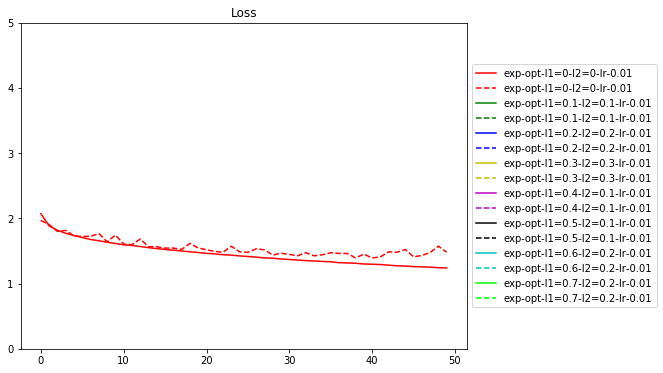

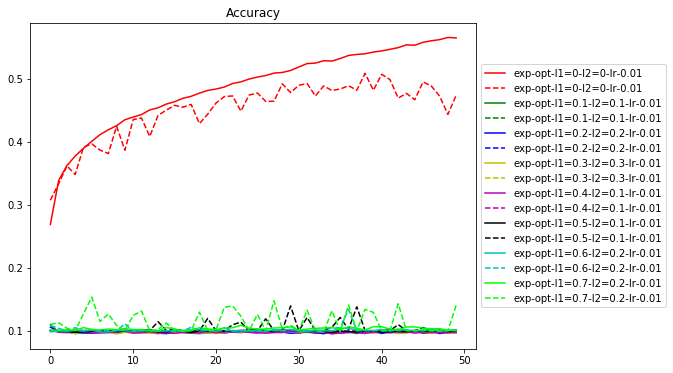

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","lime","tomato"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
#plt.legend(handles=[line_up, line_down])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
#plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""